In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

le = pd.read_excel('../DataSets/Life Expectancy.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 53, usecols = 'A:Y')

C:\Users\Diogo\AppData\Local\Temp\ipykernel_32880\2620095065.py:5: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  le = pd.read_excel('../DataSets/Life Expectancy.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 53, usecols = 'A:Y')


In [3]:
unwanted_cols = [col for col in le.columns if col.startswith('Unnamed')]
le = le.drop(unwanted_cols, axis=1)

In [5]:
le = le[(le.TIME == 'European Union - 27 countries (from 2020)') | (le.TIME == 'Portugal')]

In [8]:
le.loc[le.TIME == 'European Union - 27 countries (from 2020)', 'TIME'] = 'Europe'
le = le.rename(columns={'TIME': 'Region'})
le = le.drop('2021', axis=1)

C:\Users\Diogo\AppData\Local\Temp\ipykernel_32880\3833562458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  le.loc[le.TIME == 'European Union - 27 countries (from 2020)', 'TIME'] = 'Europe'


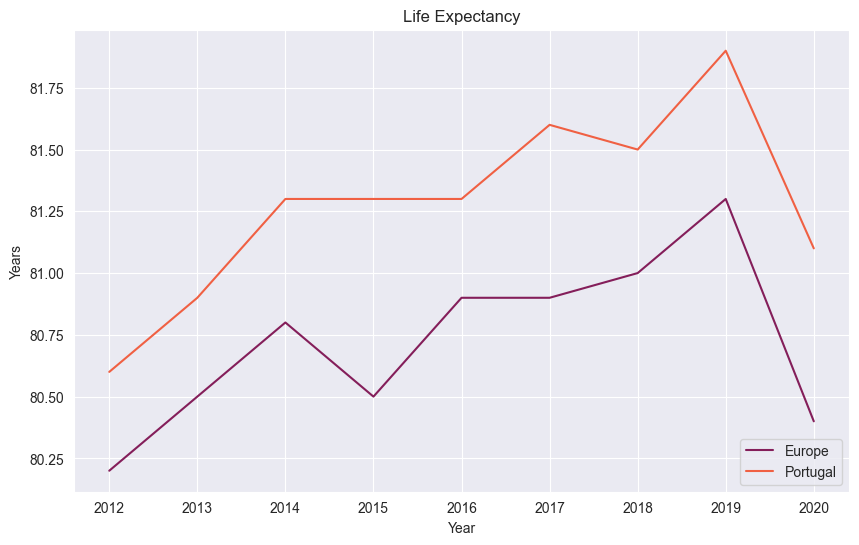

In [11]:
# Melt the DataFrame to convert the years into a single 'Year' column
le_melted = pd.melt(le, id_vars='Region', var_name='Year', value_name='Value')

# Create the line plot
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=le_melted, x='Year', y='Value', hue='Region', palette='rocket')
title = plt.title('Life Expectancy')
plt.xlabel('Year')
plt.ylabel('Years')
plt.legend(loc='lower right')
plt.savefig(f'../Graphics/{title.get_text()}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()